# 欠拟合、过拟合
我们的目标是发现模式，但是如何才能够让模型记住模式而不是简单地记住数据呢？
1. 将模型在训练数据上拟合的比在潜在分布中更接近的现象称为过拟合，正则化是对抗它们的手段之一
2. 当比较训练集和验证误差的时候，它们都很大，但是相差很小，这可能是因为我们的模型表达能力不足，过于简单，无法捕获试图学习的模式，这种现象称为欠拟合

# 独立同分布
我们假设训练数据和测试数据都是从相同的分布中独立提取的。 这通常被称为独立同分布假设


# 模型复杂度
统计学家认为，能够轻松解释任意事实的模型是非常复杂的，而表达能力有限但是仍能够很好的解释数据的模型可能更加具有现实的用途。

影响复杂性的因子：
1. 可调整参数的数量
2. 权重的值
3. 训练样本的数量

# 验证集
将数据分成三份，训练集，测试集，验证集。
或者使用***K折交叉验证***

此外，数据集的大小也决定了我们过拟合的程度，训练数据集中的样本越少，我们越有可能过拟合。

In [37]:
# 多项式回归
import math 
import numpy as npp
import torch as t
import torch.nn as nn
import sys
sys.path.append("../")
from pltutils import *

In [38]:
#使用 y= 5+1.2x-3.4x^2/2!+5.6x^3/3! + epsilon ~ N(0,0.01)
max_degree=20#多项式阶数
n_train,n_test=100,100
#20阶多项式的权重，后面都是0 所以就是3阶
true_w=np.zeros(max_degree)
true_w[0:4]=np.array([5,1.2,-3.4,5.6])
# 采样x
features=np.random.normal(size=(n_train+n_test,1))
# 打乱x
np.random.shuffle(features)
# 计算y
#y = x^0 + x^1 + ... +x^19
poly_features=np.power(features,np.arange(max_degree).reshape(1,-1))
for i in range(max_degree):
    poly_features[:,i]/=math.gamma(i+1)
labels=np.dot(poly_features,true_w)
# y+噪声
labels += np.random.normal(scale=0.1, size=labels.shape)


In [39]:
# to tensor
true_w, features, poly_features, labels = [torch.tensor(
    x, dtype=torch.float32) for x in [true_w, features, poly_features, labels]]
#看看前两个数据
features[:2], poly_features[:2, :], labels[:2]


(tensor([[ 0.7216],
         [-1.3749]]),
 tensor([[ 1.0000e+00,  7.2159e-01,  2.6034e-01,  6.2621e-02,  1.1297e-02,
           1.6303e-03,  1.9607e-04,  2.0211e-05,  1.8230e-06,  1.4616e-07,
           1.0547e-08,  6.9187e-10,  4.1604e-11,  2.3093e-12,  1.1903e-13,
           5.7259e-15,  2.5823e-16,  1.0961e-17,  4.3941e-19,  1.6688e-20],
         [ 1.0000e+00, -1.3749e+00,  9.4520e-01, -4.3319e-01,  1.4890e-01,
          -4.0945e-02,  9.3826e-03, -1.8429e-03,  3.1673e-04, -4.8386e-05,
           6.6527e-06, -8.3153e-07,  9.5274e-08, -1.0076e-08,  9.8959e-10,
          -9.0707e-11,  7.7946e-12, -6.3041e-13,  4.8153e-14, -3.4846e-15]]),
 tensor([ 5.4653, -2.2752]))

In [40]:
print(poly_features.shape,features.shape,true_w.shape,labels.shape)

torch.Size([200, 20]) torch.Size([200, 1]) torch.Size([20]) torch.Size([200])


epoch->0,trainloss=31.06,testloss=24.08
epoch->1,trainloss=22.05,testloss=16.69
epoch->2,trainloss=16.20,testloss=12.00
epoch->3,trainloss=12.38,testloss=8.99
epoch->4,trainloss=9.81,testloss=6.98
epoch->5,trainloss=8.02,testloss=5.61
epoch->6,trainloss=6.73,testloss=4.64
epoch->7,trainloss=5.76,testloss=3.93
epoch->8,trainloss=5.08,testloss=3.38
epoch->9,trainloss=4.46,testloss=2.95
epoch->10,trainloss=3.92,testloss=2.61
epoch->11,trainloss=3.50,testloss=2.32
epoch->12,trainloss=3.15,testloss=2.07
epoch->13,trainloss=2.84,testloss=1.86
epoch->14,trainloss=2.57,testloss=1.68
epoch->15,trainloss=2.34,testloss=1.52
epoch->16,trainloss=2.12,testloss=1.38
epoch->17,trainloss=1.93,testloss=1.26
epoch->18,trainloss=1.77,testloss=1.15
epoch->19,trainloss=1.61,testloss=1.05
epoch->20,trainloss=1.48,testloss=0.97
epoch->21,trainloss=1.36,testloss=0.90
epoch->22,trainloss=1.25,testloss=0.83
epoch->23,trainloss=1.17,testloss=0.78
epoch->24,trainloss=1.07,testloss=0.72
epoch->25,trainloss=0.99,tes

([31.055002,
  22.04989,
  16.198435,
  12.384865,
  9.814571,
  8.023897,
  6.725451,
  5.764588,
  5.077079,
  4.4592423,
  3.91818,
  3.4968781,
  3.148251,
  2.836751,
  2.5745006,
  2.3417459,
  2.1174524,
  1.9310989,
  1.7677246,
  1.6131237,
  1.4768634,
  1.3593361,
  1.2518091,
  1.1687697,
  1.068739,
  0.98586214,
  0.91259956,
  0.85218275,
  0.7919216,
  0.73939496,
  0.6909383,
  0.6492754,
  0.6138611,
  0.572673,
  0.538106,
  0.5132896,
  0.48222575,
  0.45629263,
  0.4327008,
  0.41310945,
  0.39634943,
  0.376064,
  0.35805172,
  0.3409502,
  0.32658207,
  0.31607258,
  0.30504212,
  0.28932947,
  0.27827165,
  0.27057517,
  0.25970322,
  0.25197354,
  0.24103227,
  0.23313591,
  0.2264134,
  0.2180301,
  0.21211758,
  0.20506577,
  0.19868422,
  0.19472405,
  0.1866222,
  0.18098341,
  0.17941344,
  0.1719742,
  0.16669056,
  0.16171083,
  0.15734857,
  0.15575531,
  0.1489791,
  0.14530154,
  0.14202343,
  0.13762014,
  0.1343281,
  0.13040128,
  0.12720567,
  0.1

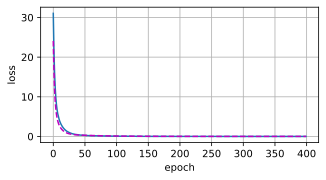

In [69]:

import random
def data_iter(batch_size: int, features: torch.Tensor, labels: torch.Tensor):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

def train(train_features: t.Tensor, test_features: t.Tensor, train_labels: t.Tensor, test_labels: t.Tensor, num_epochs=400):
    loss_func = nn.MSELoss()
    input_shape = train_features.shape[-1]
    # bias = false 因为在多项式中实现了bias
    net = nn.Linear(input_shape,1,bias=False)
    # train size = [numberofsamples , dims]
    batch_size = min (10,train_labels.shape[0])
    optimzer = t.optim.SGD(net.parameters(),lr=0.01)
    trainloss = []
    testloss=[]
    for i in range(num_epochs):
        ep_loss_train = []
        ep_loss_test=[]
        train_iter, test_iter = data_iter(batch_size, train_features, train_labels), data_iter(
            batch_size, test_features, test_labels)

        for x,y in train_iter:
            y_ = net.forward(x)
            loss = loss_func(y_,y.unsqueeze(1))
            optimzer.zero_grad()
            loss.backward()
            optimzer.step()
            ep_loss_train.append(loss.detach().cpu().numpy())
        for x,y in test_iter:
            y_ = net.forward(x)
            loss = loss_func(y_, y.unsqueeze(1))
            ep_loss_test.append(loss.detach().cpu().numpy())
        trainloss.append(np.mean(ep_loss_train))
        testloss.append(np.mean(ep_loss_test))
        print(
            f'epoch->{i},trainloss={trainloss[i] :.2f},testloss={testloss[i] :.2f}')
    print("weight:",net.weight.data.numpy())
    plot(np.arange(0, len(trainloss)), (trainloss,testloss),
         'epoch', 'loss', figsize=(5, 2.5))
    return trainloss,testloss

train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])


# 欠拟合情况

epoch->0,trainloss=33.76,testloss=27.00
epoch->1,trainloss=25.19,testloss=19.71
epoch->2,trainloss=19.49,testloss=14.82
epoch->3,trainloss=15.68,testloss=11.53
epoch->4,trainloss=12.98,testloss=9.34
epoch->5,trainloss=11.22,testloss=7.86
epoch->6,trainloss=10.06,testloss=6.88
epoch->7,trainloss=9.27,testloss=6.23
epoch->8,trainloss=8.73,testloss=5.81
epoch->9,trainloss=8.36,testloss=5.52
epoch->10,trainloss=8.12,testloss=5.33
epoch->11,trainloss=7.96,testloss=5.20
epoch->12,trainloss=7.86,testloss=5.12
epoch->13,trainloss=7.79,testloss=5.07
epoch->14,trainloss=7.73,testloss=5.03
epoch->15,trainloss=7.70,testloss=5.01
epoch->16,trainloss=7.72,testloss=5.00
epoch->17,trainloss=7.70,testloss=4.99
epoch->18,trainloss=7.64,testloss=4.98
epoch->19,trainloss=7.64,testloss=4.98
epoch->20,trainloss=7.64,testloss=4.98
epoch->21,trainloss=7.64,testloss=4.98
epoch->22,trainloss=7.63,testloss=4.99
epoch->23,trainloss=7.64,testloss=4.99
epoch->24,trainloss=7.63,testloss=4.99
epoch->25,trainloss=7.62

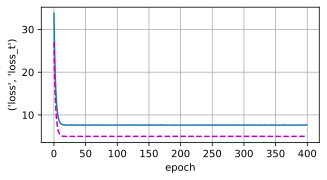

In [62]:
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])


# 过拟合 , 理论上是应该过拟合的，焯！
可以看到，验证集的误差是测试集的1/2，所以可以判定过拟合了。

epoch->0,trainloss=27.69,testloss=21.03
epoch->1,trainloss=19.86,testloss=14.83
epoch->2,trainloss=14.85,testloss=10.84
epoch->3,trainloss=11.51,testloss=8.21
epoch->4,trainloss=9.34,testloss=6.46
epoch->5,trainloss=7.57,testloss=5.23
epoch->6,trainloss=6.36,testloss=4.34
epoch->7,trainloss=5.51,testloss=3.67
epoch->8,trainloss=4.70,testloss=3.17
epoch->9,trainloss=4.13,testloss=2.77
epoch->10,trainloss=3.69,testloss=2.44
epoch->11,trainloss=3.23,testloss=2.17
epoch->12,trainloss=2.90,testloss=1.94
epoch->13,trainloss=2.59,testloss=1.76
epoch->14,trainloss=2.32,testloss=1.59
epoch->15,trainloss=2.10,testloss=1.46
epoch->16,trainloss=1.90,testloss=1.34
epoch->17,trainloss=1.73,testloss=1.24
epoch->18,trainloss=1.58,testloss=1.15
epoch->19,trainloss=1.44,testloss=1.07
epoch->20,trainloss=1.32,testloss=1.01
epoch->21,trainloss=1.21,testloss=0.95
epoch->22,trainloss=1.13,testloss=0.90
epoch->23,trainloss=1.03,testloss=0.86
epoch->24,trainloss=0.96,testloss=0.82
epoch->25,trainloss=0.89,tes

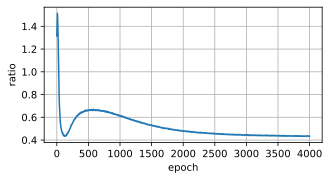

In [76]:
trainloss,testloss=train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:],num_epochs=4000)
ratio = np.array(trainloss)/np.array(testloss)
plot(np.arange(0,ratio.size),ratio,"epoch","ratio")